# 6.6 Sourcing & Analyzing Time Series Data

# Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

# Loading and checking the data

In [2]:
# Define the path to the directory
path = '/Users/marika/'

In [3]:
# Import data file "df_crude_rates_merged.csv"
df_wb_data = pd.read_csv(r'/Users/marika/WB-DATA.csv', index_col=False)

# Read the CSV file using os.path.join()
df_wb_data = pd.read_csv(os.path.join(path, 'WB-DATA.csv'))

# Check data

In [4]:
df_wb_data.head()

,series_id,country_code,country_name,year,value
0,VC.PKP.TOTL.UN,XKX,Kosovo,2017,357.0
1,VC.PKP.TOTL.UN,XKX,Kosovo,2016,462.0
2,VC.PKP.TOTL.UN,XKX,Kosovo,2015,640.0
3,VC.PKP.TOTL.UN,XKX,Kosovo,2014,736.0
4,VC.PKP.TOTL.UN,XKX,Kosovo,2013,756.0


# Cleaning, Wrangling, and Subsetting

In [5]:
values = df_wb_data.groupby( df_wb_data['year'])['value'].count()

In [6]:
values

year
1990    175
1991    163
1992    176
1993    181
1994    196
1995    198
1996    205
1997    202
1998    196
1999    215
2000    237
2001    257
2002    260
2003    278
2004    306
2005    312
2006    330
2007    348
2008    374
2009    397
2010    441
2011    430
2012    485
2013    402
2014    442
2015    449
2016    412
2017    422
2018    395
2019    407
2020    384
2021    319
2022      6
Name: value, dtype: int64

In [7]:
#avg duration of values within the years
avg_duration_values = df_wb_data.groupby('year')['value'].mean()

In [8]:
avg_duration_values

year
1990    6.714150e+00
1991    7.511296e+00
1992    8.051777e+00
1993    8.505468e+00
1994    9.299717e+00
1995    8.649472e+00
1996    8.089982e+00
1997    8.873103e+00
1998    8.087272e+00
1999    7.633610e+00
2000    7.883286e+00
2001    7.860456e+00
2002    8.732990e+00
2003    8.160360e+00
2004    8.182688e+00
2005    8.483114e+00
2006    8.538811e+00
2007    1.251628e+02
2008    8.839795e+00
2009    1.552689e+04
2010    1.283699e+04
2011    1.139842e+04
2012    1.052238e+04
2013    1.157463e+04
2014    1.206449e+04
2015    1.906881e+04
2016    4.744389e+04
2017    4.706245e+04
2018    5.246712e+04
2019    6.028200e+04
2020    7.100344e+04
2021    9.861786e+04
2022    6.582567e+06
Name: value, dtype: float64

In [9]:
# Keeping year to four digits
df_wb_data['year'] = pd.to_datetime(df_wb_data['year'].astype(str), format='%Y')
df_wb_data['year'] = df_wb_data['year'].dt.strftime('%Y')

In [10]:
df_wb_data.head()

,series_id,country_code,country_name,year,value
0,VC.PKP.TOTL.UN,XKX,Kosovo,2017,357.0
1,VC.PKP.TOTL.UN,XKX,Kosovo,2016,462.0
2,VC.PKP.TOTL.UN,XKX,Kosovo,2015,640.0
3,VC.PKP.TOTL.UN,XKX,Kosovo,2014,736.0
4,VC.PKP.TOTL.UN,XKX,Kosovo,2013,756.0


In [11]:
# Compute the average value for each year and add it as a new column 'avg_duration_values'
df_wb_data['avg_duration_values'] = df_wb_data.groupby('year')['value'].transform('mean')

# Verify the result
print(df_wb_data.head())

        series_id country_code country_name  year  value  avg_duration_values
0  VC.PKP.TOTL.UN          XKX       Kosovo  2017  357.0         47062.449513
1  VC.PKP.TOTL.UN          XKX       Kosovo  2016  462.0         47443.893479
2  VC.PKP.TOTL.UN          XKX       Kosovo  2015  640.0         19068.807091
3  VC.PKP.TOTL.UN          XKX       Kosovo  2014  736.0         12064.494239
4  VC.PKP.TOTL.UN          XKX       Kosovo  2013  756.0         11574.632770


In [12]:
# Select only the 'year', 'value', and 'avg_duration_values' columns
selected_columns_df = df_wb_data[['year', 'value', 'avg_duration_values']]

In [13]:
selected_columns_df

,year,value,avg_duration_values
0,2017,357.0,47062.449513
1,2016,462.0,47443.893479
2,2015,640.0,19068.807091
3,2014,736.0,12064.494239
4,2013,756.0,11574.632770
...,...,...,...
9995,2020,21772900.0,71003.442880
9996,2019,19019900.0,60281.995077
9997,2018,16452500.0,52467.123788
9998,2017,14010900.0,47062.449513


# Why I chose these data points

This data includes years and values that can contribute to my analysis on the crude suicide rates. Assuming the values have death rates that are suicide rates, I am able to see if the values have evolved over the years.

In [14]:
# Select only the 'year' and 'value'
yr_value_df = df_wb_data[['year', 'value']]

In [15]:
yr_value_df

,year,value
0,2017,357.0
1,2016,462.0
2,2015,640.0
3,2014,736.0
4,2013,756.0
...,...,...
9995,2020,21772900.0
9996,2019,19019900.0
9997,2018,16452500.0
9998,2017,14010900.0


In [16]:
# Check for missing values (you shouldn't have any)

yr_value_df.isnull().sum() 

year     0
value    0
dtype: int64

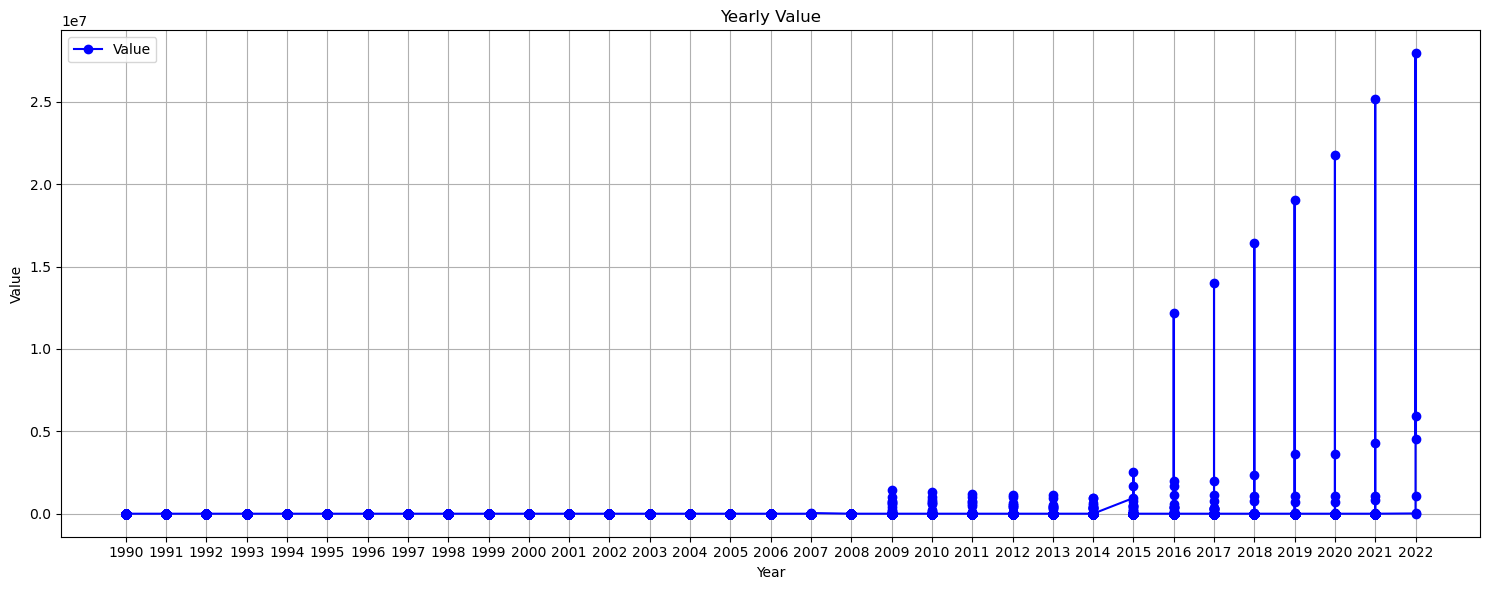

In [17]:
import matplotlib.pyplot as plt

# Sort DataFrame by 'year'
df_wb_data_sorted = df_wb_data.sort_values(by='year')

plt.figure(figsize=(15, 6))  # Adjust the figure size if needed

# Plotting 'year' against 'value'
plt.plot(df_wb_data_sorted['year'], df_wb_data_sorted['value'], marker='o', linestyle='-', color='b', label='Value')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Yearly Value')
plt.grid(True)  # Add grid lines for better readability
plt.legend()  # Show legend based on label 'Value'

# Show plot
plt.tight_layout()  # Adjust layout for better fit of labels
plt.show()

# It looks like as the years increase, so does the values

# Times series analysis - decomposition

In [18]:
years = yr_value_df['year']  # Extracting 'year' column
values = yr_value_df['value']  # Extracting 'value' column

In [19]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [20]:
decomposition = seasonal_decompose(yr_value_df['value'], model='additive', period=1)

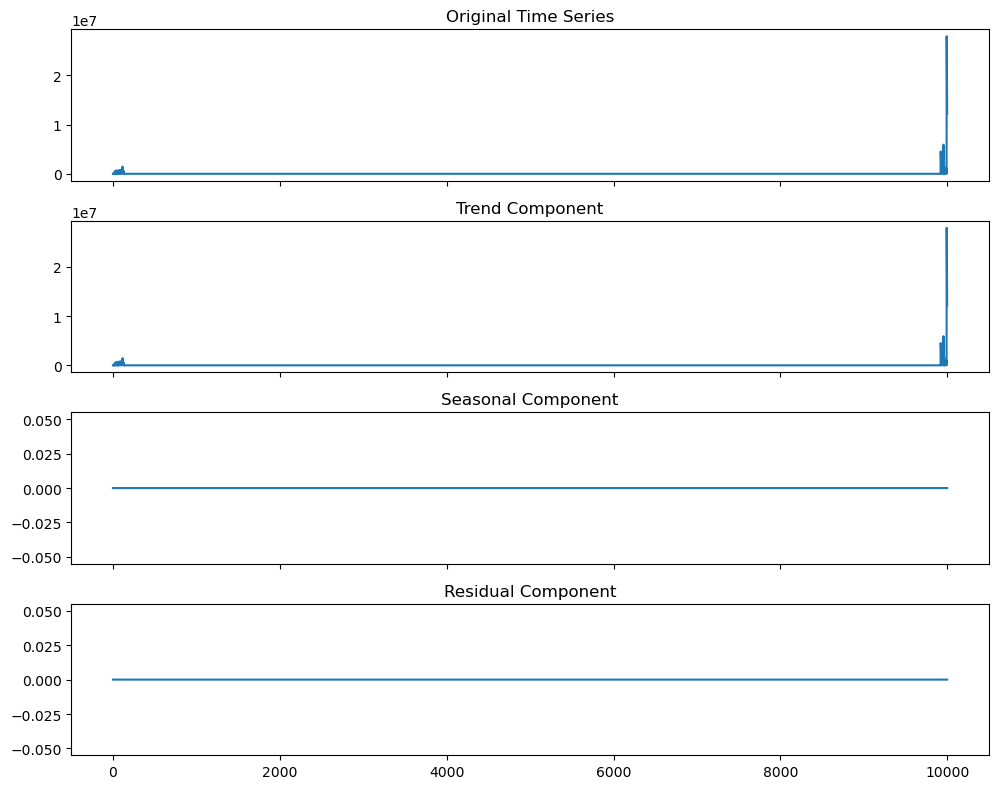

In [21]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

yr_value_df['value'].plot(ax=ax1)
ax1.set_title('Original Time Series')

decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend Component')

decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal Component')

decomposition.resid.plot(ax=ax4)
ax4.set_title('Residual Component')

plt.tight_layout()
plt.show()

In [36]:
# Group by Year and calculate the mean suicide rate
yr_value_df = df_wb_data.groupby('year')['value'].mean().reset_index()

# Ensure data is ordered by Year
yr_value_df = yr_value_df.sort_values(by='year')

# Set Year as index for time series analysis
yr_value_df.set_index('year', inplace=True)

In [38]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(yr_value_df['value'], model='additive', period=1)  # Adjust 'period' as needed

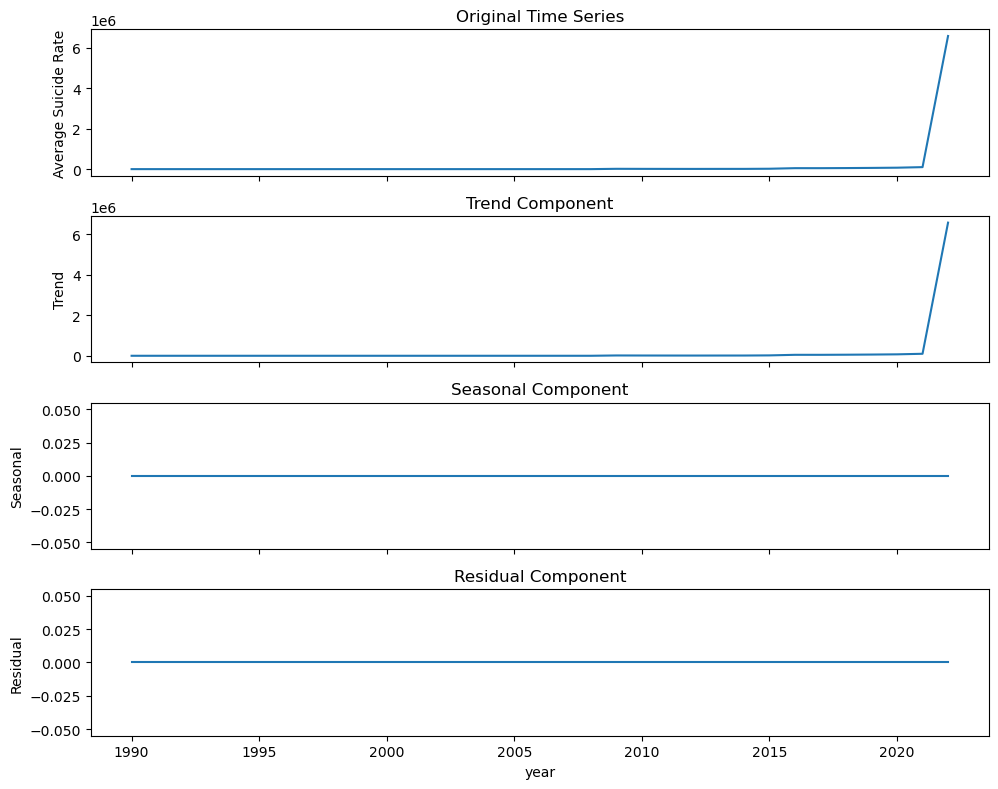

In [39]:
# Plotting the original time series and its components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# Original time series
yr_value_df['value'].plot(ax=ax1)
ax1.set_title('Original Time Series')
ax1.set_ylabel('Average Suicide Rate')

# Trend component
decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend Component')
ax2.set_ylabel('Trend')

# Seasonal component
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal Component')
ax3.set_ylabel('Seasonal')

# Residual component
decomposition.resid.plot(ax=ax4)
ax4.set_title('Residual Component')
ax4.set_ylabel('Residual')

plt.tight_layout()
plt.show()

# The trend seems to only have increased at the end. Seasonal and residual seem to have a static line so it suggests little change in the series over time. 

# Testing for stationarity

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [23]:
def dickey_fuller_test(timeseries):
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)

In [24]:
# Apply the Dickey-Fuller test
dickey_fuller_test(yr_value_df['value'])

Results of Dickey-Fuller Test:
Test Statistic                    9.954648
p-value                           1.000000
#Lags Used                       38.000000
Number of Observations Used    9961.000000
Critical Value (1%)              -3.431007
Critical Value (5%)              -2.861830
Critical Value (10%)             -2.566924
dtype: float64


# Since the p-value is 1.0, it indicates strong evidence that we cannot reject the null hypothesis. Therefore, I have to conduct differencing

In [25]:
years = yr_value_df['year']  # Extracting 'year' column
values = yr_value_df['value']  # Extracting 'value' column

In [26]:
yr_value_df.head()

,year,value
0,2017,357.0
1,2016,462.0
2,2015,640.0
3,2014,736.0
4,2013,756.0


In [27]:
# Calculate first-order difference using .loc to avoid SettingWithCopyWarning
yr_value_df.loc[:, 'First_Difference'] = yr_value_df['value'].diff()

# Print the updated DataFrame
print(yr_value_df)

      year       value  First_Difference
0     2017       357.0               NaN
1     2016       462.0             105.0
2     2015       640.0             178.0
3     2014       736.0              96.0
4     2013       756.0              20.0
...    ...         ...               ...
9995  2020  21772900.0        -3424200.0
9996  2019  19019900.0        -2753000.0
9997  2018  16452500.0        -2567400.0
9998  2017  14010900.0        -2441600.0
9999  2016  12184200.0        -1826700.0

[10000 rows x 3 columns]


/var/folders/zz/ztknjg01693_5_h12npzs1l00000gn/T/ipykernel_79259/2009744874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yr_value_df.loc[:, 'First_Difference'] = yr_value_df['value'].diff()


In [28]:
# Perform Dickey-Fuller test on 'value' column
result = adfuller(yr_value_df['value'])

# Extract and print test results
print('Results of Dickey-Fuller Test:')
dfoutput = pd.Series(result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in result[4].items():
    dfoutput[f'Critical Value ({key})'] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                    9.954648
p-value                           1.000000
#Lags Used                       38.000000
Number of Observations Used    9961.000000
Critical Value (1%)              -3.431007
Critical Value (5%)              -2.861830
Critical Value (10%)             -2.566924
dtype: float64


# Performing second-order difference

In [29]:
# Calculate first-order difference
yr_value_df['First_Difference'] = yr_value_df['value'].diff()

# Calculate second-order difference
yr_value_df['Second_Difference'] = yr_value_df['First_Difference'].diff()

# Print the resulting DataFrame
print(yr_value_df)

      year       value  First_Difference  Second_Difference
0     2017       357.0               NaN                NaN
1     2016       462.0             105.0                NaN
2     2015       640.0             178.0               73.0
3     2014       736.0              96.0              -82.0
4     2013       756.0              20.0              -76.0
...    ...         ...               ...                ...
9995  2020  21772900.0        -3424200.0          -682700.0
9996  2019  19019900.0        -2753000.0           671200.0
9997  2018  16452500.0        -2567400.0           185600.0
9998  2017  14010900.0        -2441600.0           125800.0
9999  2016  12184200.0        -1826700.0           614900.0

[10000 rows x 4 columns]


/var/folders/zz/ztknjg01693_5_h12npzs1l00000gn/T/ipykernel_79259/1856908943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yr_value_df['First_Difference'] = yr_value_df['value'].diff()
/var/folders/zz/ztknjg01693_5_h12npzs1l00000gn/T/ipykernel_79259/1856908943.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yr_value_df['Second_Difference'] = yr_value_df['First_Difference'].diff()


In [30]:
# Perform Dickey-Fuller test on the second-order difference
result = adfuller(yr_value_df['Second_Difference'].dropna())

# Print the results
print('Results of Dickey-Fuller Test:')
print(f'Test Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'#Lags Used: {result[2]}')
print(f'Number of Observations Used: {result[3]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

Results of Dickey-Fuller Test:
Test Statistic: -27.526753980897556
p-value: 0.0
#Lags Used: 38
Number of Observations Used: 9959
Critical Values:
1%: -3.4310067914762
5%: -2.8618302626314684
10%: -2.5669245016624593


# The p-value is now 0, meaning there is an extremely strong evidence against the null hypothesis and the time series data is stationary. 

# Checking for autocorrelations

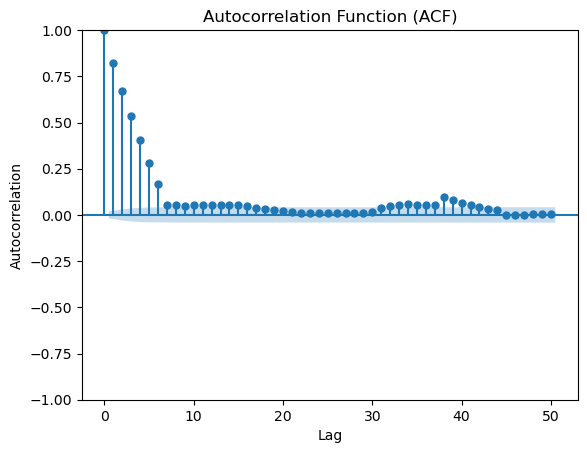

In [31]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF
plot_acf(yr_value_df['value'], lags=50)  
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

In [32]:
# Ensure the path
path = '/Users/marika/World Health Organization Analysis/Visuals'

# Save the plot to the "Visuals" folder
file_name = os.path.join(path, 'wb_data.png')
plt.savefig(file_name)

<Figure size 640x480 with 0 Axes>